In [109]:
%load_ext autoreload
%autoreload 2
from pyseir.parameters.parameter_ensemble_generator import ParameterEnsembleGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [99]:
config = yaml.safe_load(open('pyseir/parameters/config.yaml').read())

In [29]:
config

{'default': {'R_initial': {'value': 0},
  'E_initial': {'value': 0},
  'D_initial': {'value': 0},
  'HGen_initial': {'value': 0},
  'HICU_initial': {'value': 0},
  'HICUVent_initial': {'value': 0},
  'gamma': {'func': None,
   'clip': None,
   'dist': 'uniform',
   'dist_params': {'low': 0.4, 'high': 0.6}},
  'A_initial': {'func': "lambda x: parameter_set['gamma'] * parameter_set['I_initial'] / (1 - parameter_set['gamma'])",
   'clip': None},
  'R0': {'func': None,
   'clip': None,
   'parameter': None,
   'dist': 'uniform',
   'dist_params': {'low': 3, 'high': 4.5}},
  'R0_hospital': {'func': None,
   'clip': None,
   'parameter': None,
   'dist': 'uniform',
   'dist_params': {'low': 0.5, 'high': 0.75}},
  'sigma': {'func': 'lambda x: 1/x',
   'clip': [0, None],
   'dist': 'normal',
   'dist_params': {'loc': 3.1, 'scale': 0.86}},
  'delta': {'func': 'lambda x: 1/x',
   'clip': [0, None],
   'dist': 'gamma',
   'dist_params': {'shape': 6, 'scale': 1}},
  'delta_hospital': {'func': 'lam

In [118]:
peg = ParameterEnsembleGenerator(fips = '06075',
                                 N_samples=10000,
                                 t_list=np.linspace(0, 360, 360),
                                 parameter_defaults_config=config['default'],
                                 scenario='old')
parameter_sets_old = peg.sample_seir_parameters()

In [120]:
peg = ParameterEnsembleGenerator(fips = '06075',
                                 N_samples=10000,
                                 t_list=np.linspace(0, 360, 360),
                                 parameter_defaults_config=config['default'],
                                 scenario='new')
parameter_sets_new = peg.sample_seir_parameters()

Could not match ('AS', 'American Samoa')
Could not match ('PR', 'Mayaguez')
Could not match ('MP', 'Saipan')
Could not match ('GU', 'Guam')


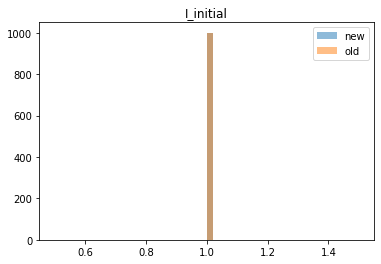

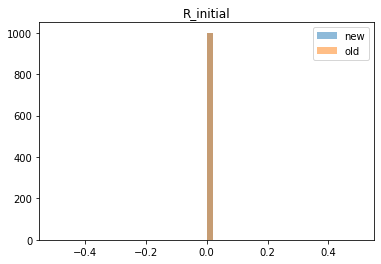

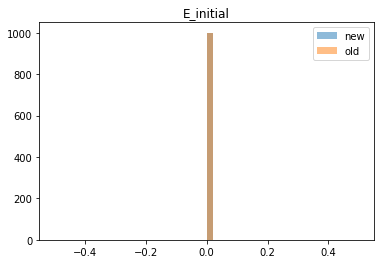

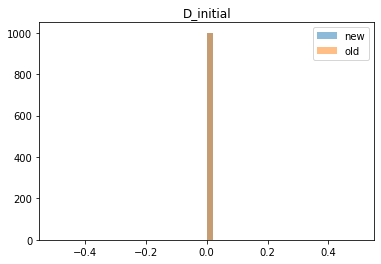

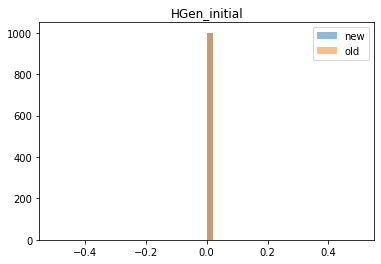

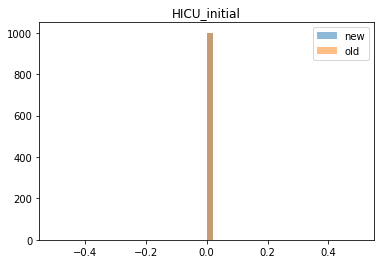

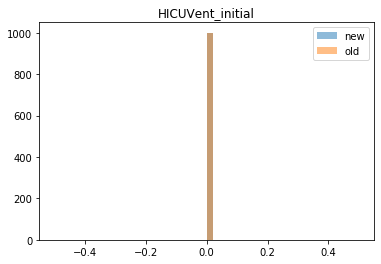

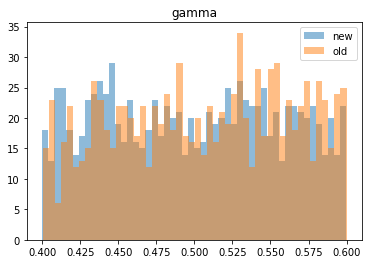

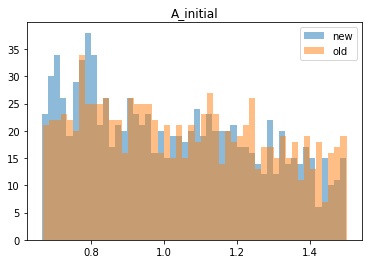

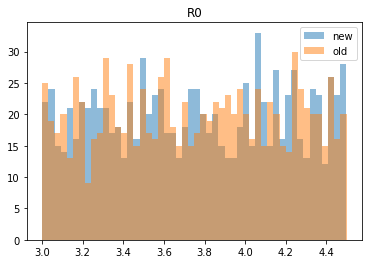

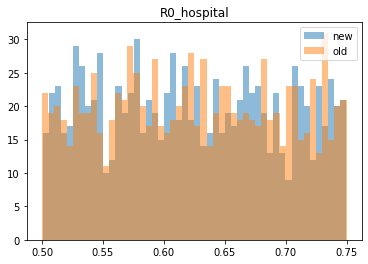

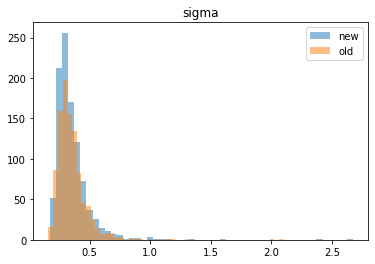

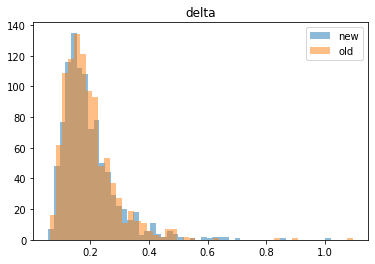

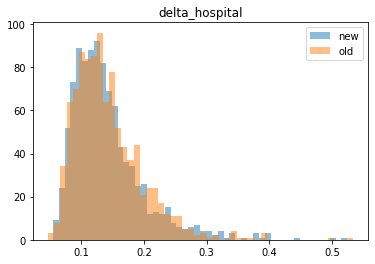

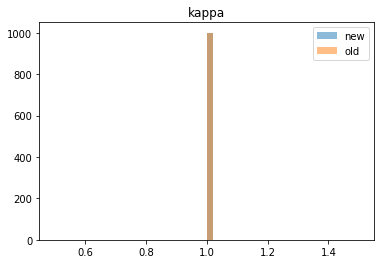

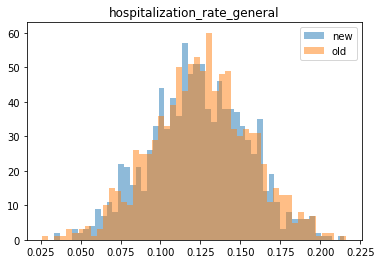

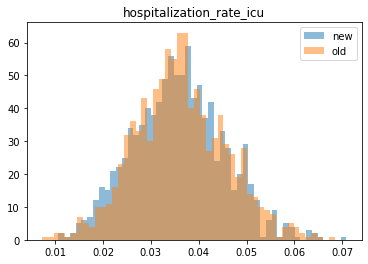

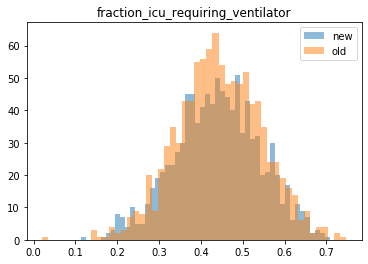

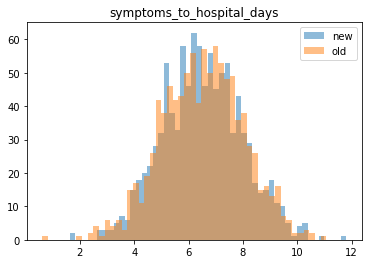

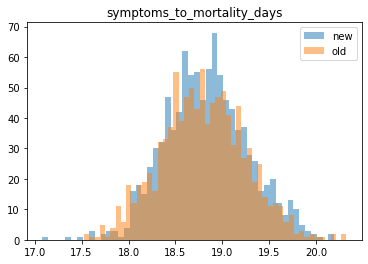

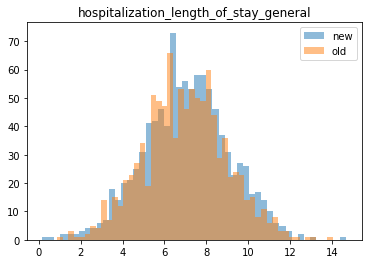

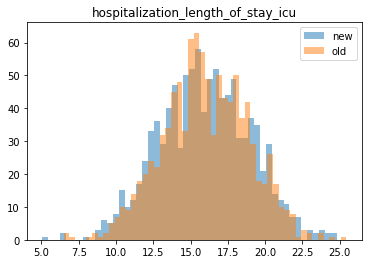

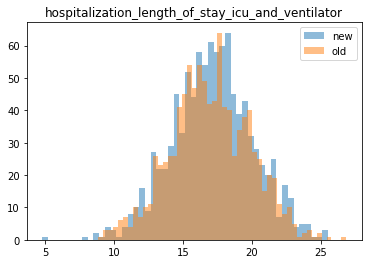

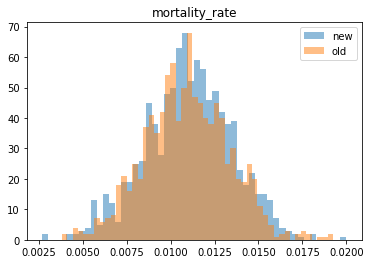

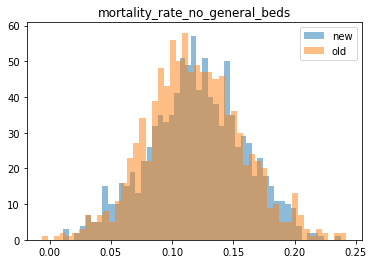

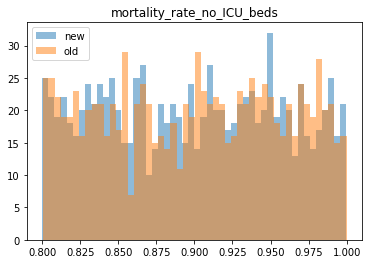

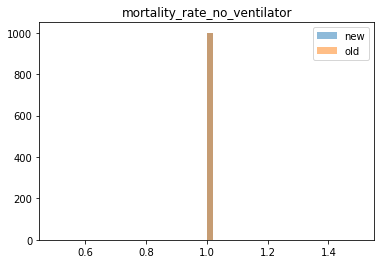

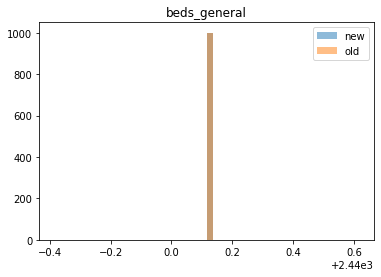

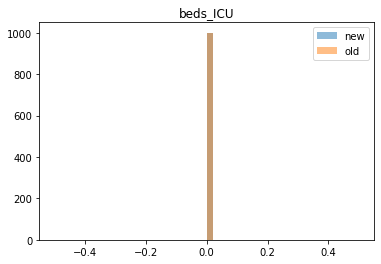

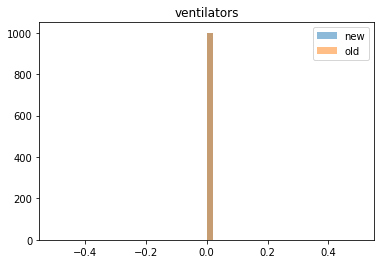

In [121]:
for k in parameter_sets_new[0]:
    if k not in ['suppression_policy', 't_list', 'N']:
        param_new = [parameter_sets_new[n][k] for n in range(1000)]
        param_old = [parameter_sets_old[n][k] for n in range(1000)]

        plt.figure()
        plt.hist(param_new, alpha=0.5, bins=50, label='new')
        plt.hist(param_old, alpha=0.5, bins=50, label='old')
        plt.legend()
        plt.title(k)
        plt.show()